In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [2]:
from util import RESOURCE_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
len(df)
df.head()

,Projects,Domains,mybatis,jOOQ,Spring,JPA,JDBC,Hibernate,EclipseLink
0,Activiti,automation,1,0,1,1,0,1,0
1,airbyte,infrastructure management,0,1,0,0,0,0,0
2,airsonic,media,1,0,0,0,0,0,1
3,spring-cloud-alibaba,infrastructure management,0,0,1,0,0,1,0
4,nacos,infrastructure management,1,0,0,0,0,0,0


In [3]:
df.iloc[: , 2:].sum().sort_values(ascending=False)

mybatis        158
Hibernate       95
JPA             68
Spring          45
EclipseLink     14
jOOQ             7
JDBC             0
dtype: int64

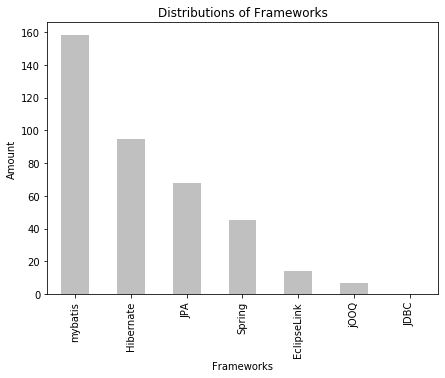

In [4]:
plt.figure(figsize=(7,5))
df.iloc[: , 2:].sum().sort_values(ascending=False).plot(kind='bar', title="Distributions of Frameworks", color='silver')
plt.xlabel("Frameworks")
plt.ylabel("Amount")
plt.show() 

In [5]:
from util import USAGE_FAN_IN_FILE
df = pd.read_excel(USAGE_FAN_IN_FILE, engine = 'openpyxl')
df.head()

,Projects,First-Level,Second-Level,Total
0,Activiti,77,198,275
1,airbyte,46,88,134
2,airsonic,1,4,5
3,spring-cloud-alibaba,0,0,0
4,nacos,9,5,14


Text(0, 0.5, 'Amount')

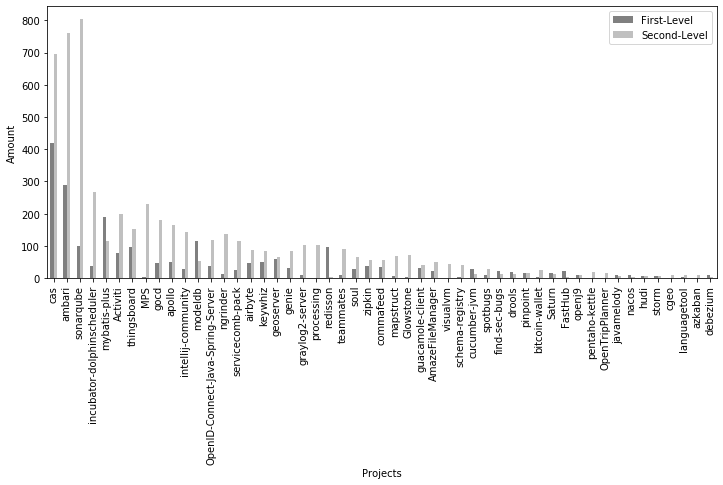

In [32]:
df = df.iloc[: , :].sort_values(by='Total', ascending=False)
filtered_df = df[df['Total']> 10]
fig, ax = plt.subplots()
filtered_df.iloc[: , :3].plot.bar(x='Projects', ax=ax, color=('gray', 'silver'), figsize=(12,5))
plt.ylabel("Amount")
#sns.distplot(medias, hist=True, kde=True, bins=20)